In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from Tools.demo.spreadsheet import Sheet
from scipy.stats import zscore
from scipy import stats
from statsmodels.stats.outliers_influence import outlier_test
import seaborn as sns
import openpyxl

In [14]:
features = pd.read_csv(r"C:\Users\demir\OneDrive\Desktop\MSc Thesis\Data\features.csv", delimiter=";", header=0)
volatile_rates = pd.read_csv(r"C:\Users\demir\OneDrive\Desktop\MSc Thesis\Data\labels.csv", delimiter=";", header=0)
mass_data = pd.read_excel(r"C:\Users\demir\OneDrive\Desktop\MSc Thesis\Data\overalldata.xlsx", sheet_name= "mass", header=0)

In [15]:
raw_data = pd.concat([features, mass_data['m_dried'], mass_data['m_rxn_dried'],volatile_rates['devol_yield']], axis=1)
raw_data = raw_data.drop(columns = ['atmosphere'])

In [16]:
char_1_columns = ['wc_1',	'vm_1'	,'fc_1'	,'ac_1'	,'c_1',	'h_1',	'o_1',	'n_1',	's_1',	'cl_1',	'hc_1',	'oc_1',	'lhv_1']
char_2_columns = ['wc_2', 'vm_2', 'fc_2', 'ac_2', 'c_2',	'h_2',	'o_2',	'n_2',	's_2',	'cl_2',	'hc_2',	'oc_2',	'lhv_2']

fuel_char_1 = raw_data[char_1_columns]
fuel_char_2 = raw_data[char_2_columns]

# Calculate fuel_char_1 and fuel_char_2 as weighted products
fuel_char_1_weighted = raw_data['x_fuel1'].values[:, None] * fuel_char_1.values
fuel_char_2_weighted = raw_data['x_fuel2'].values[:, None] * fuel_char_2.values

# Add the weighted characteristics to get total characteristics
fuel_char_total = pd.DataFrame(fuel_char_1_weighted + fuel_char_2_weighted, columns=['wc', 'vm', 'fc', 'ac', 'c', 'h', 'o', 'n', 's', 'cl', 'hc', 'oc', 'lhv'])

# Drop the original columns
data = raw_data.drop(columns=[
    'wc_1', 'vm_1', 'fc_1', 'ac_1', 'c_1', 'h_1', 'o_1', 'n_1', 's_1', 'cl_1', 'hc_1', 'oc_1', 'lhv_1',
    'wc_2', 'vm_2', 'fc_2', 'ac_2', 'c_2', 'h_2', 'o_2', 'n_2', 's_2', 'cl_2', 'hc_2', 'oc_2', 'lhv_2', 'x_fuel1', 'x_fuel2'
])

# Combine the total characteristics into the DataFrame
data = pd.concat([data, fuel_char_total], axis=1)

# Print the resulting total characteristics
print("Weighted Fuel Characteristics (Total):")
print(data.columns)

Weighted Fuel Characteristics (Total):
Index(['sample', 'temperature', 'residence_time', 'pressure', 'heat_rate',
       'm_dried', 'm_rxn_dried', 'devol_yield', 'wc', 'vm', 'fc', 'ac', 'c',
       'h', 'o', 'n', 's', 'cl', 'hc', 'oc', 'lhv'],
      dtype='object')


In [17]:
coal_samples,  gummi_samples, digestate_samples, ebs1_samples, sewage_samples, wood_samples, ebs2_samples, htc_samples, cellulose_samples, lig_samples, hc_samples, bks_samples = [], [], [], [], [], [], [], [], [], [], [], []
for i in data['sample']:
    if 'coal' in str(i):
        coal_samples.append(data[data['sample'] == i])
    if 'gumm' in str(i):
        gummi_samples.append(data[data['sample'] == i])
    if 'gm_' in str(i):
        gummi_samples.append(data[data['sample'] == i])
    if 'digestate' in str(i):
        digestate_samples.append(data[data['sample'] == i])
    if 'dgt' in str(i):
        digestate_samples.append(data[data['sample'] == i])
    if 'dgst' in str(i):
        digestate_samples.append(data[data['sample'] == i])
    if 'ebs1' in str(i):
        ebs1_samples.append(data[data['sample'] == i])
    if 'sewage' in str(i):
        sewage_samples.append(data[data['sample'] == i])
    if 'swg' in str(i):
        sewage_samples.append(data[data['sample'] == i])
    if 'swage' in str(i):
        sewage_samples.append(data[data['sample'] == i])
    if 'refuse' in str(i):
        ebs2_samples.append(data[data['sample'] == i])
    if 'ebs2' in str(i):
        ebs2_samples.append(data[data['sample'] == i])
    if 'wood' in str(i):
        wood_samples.append(data[data['sample'] == i])
    if 'wod' in str(i):
        wood_samples.append(data[data['sample'] == i])
    if 'wd' in str(i):
        wood_samples.append(data[data['sample'] == i])
    if 'htc' in str(i):
        htc_samples.append(data[data['sample'] == i])
    if 'cel' in str(i):
        cellulose_samples.append(data[data['sample'] == i])
    if 'lig' in str(i):
        lig_samples.append(data[data['sample'] == i])
    if 'hc' in str(i):
        hc_samples.append(data[data['sample'] == i])
    if 'bks' in str(i):
        coal_samples.append(data[data['sample'] == i])

gummi_samples_df = pd.concat(gummi_samples, ignore_index=True)
coal_samples_df = pd.concat(coal_samples, ignore_index=True)
digestate_samples_df = pd.concat(digestate_samples, ignore_index=True)
ebs1_samples_df = pd.concat(ebs1_samples, ignore_index=True)
sewage_samples_df = pd.concat(sewage_samples, ignore_index=True)
ebs2_samples_df = pd.concat(ebs2_samples, ignore_index=True)
wood_samples_df = pd.concat(wood_samples, ignore_index=True)
htc_samples_df = pd.concat(htc_samples, ignore_index=True)
cellulose_samples_df = pd.concat(cellulose_samples, ignore_index=True)
lig_samples_df = pd.concat(lig_samples, ignore_index=True)
hc_samples_df = pd.concat(hc_samples, ignore_index=True)


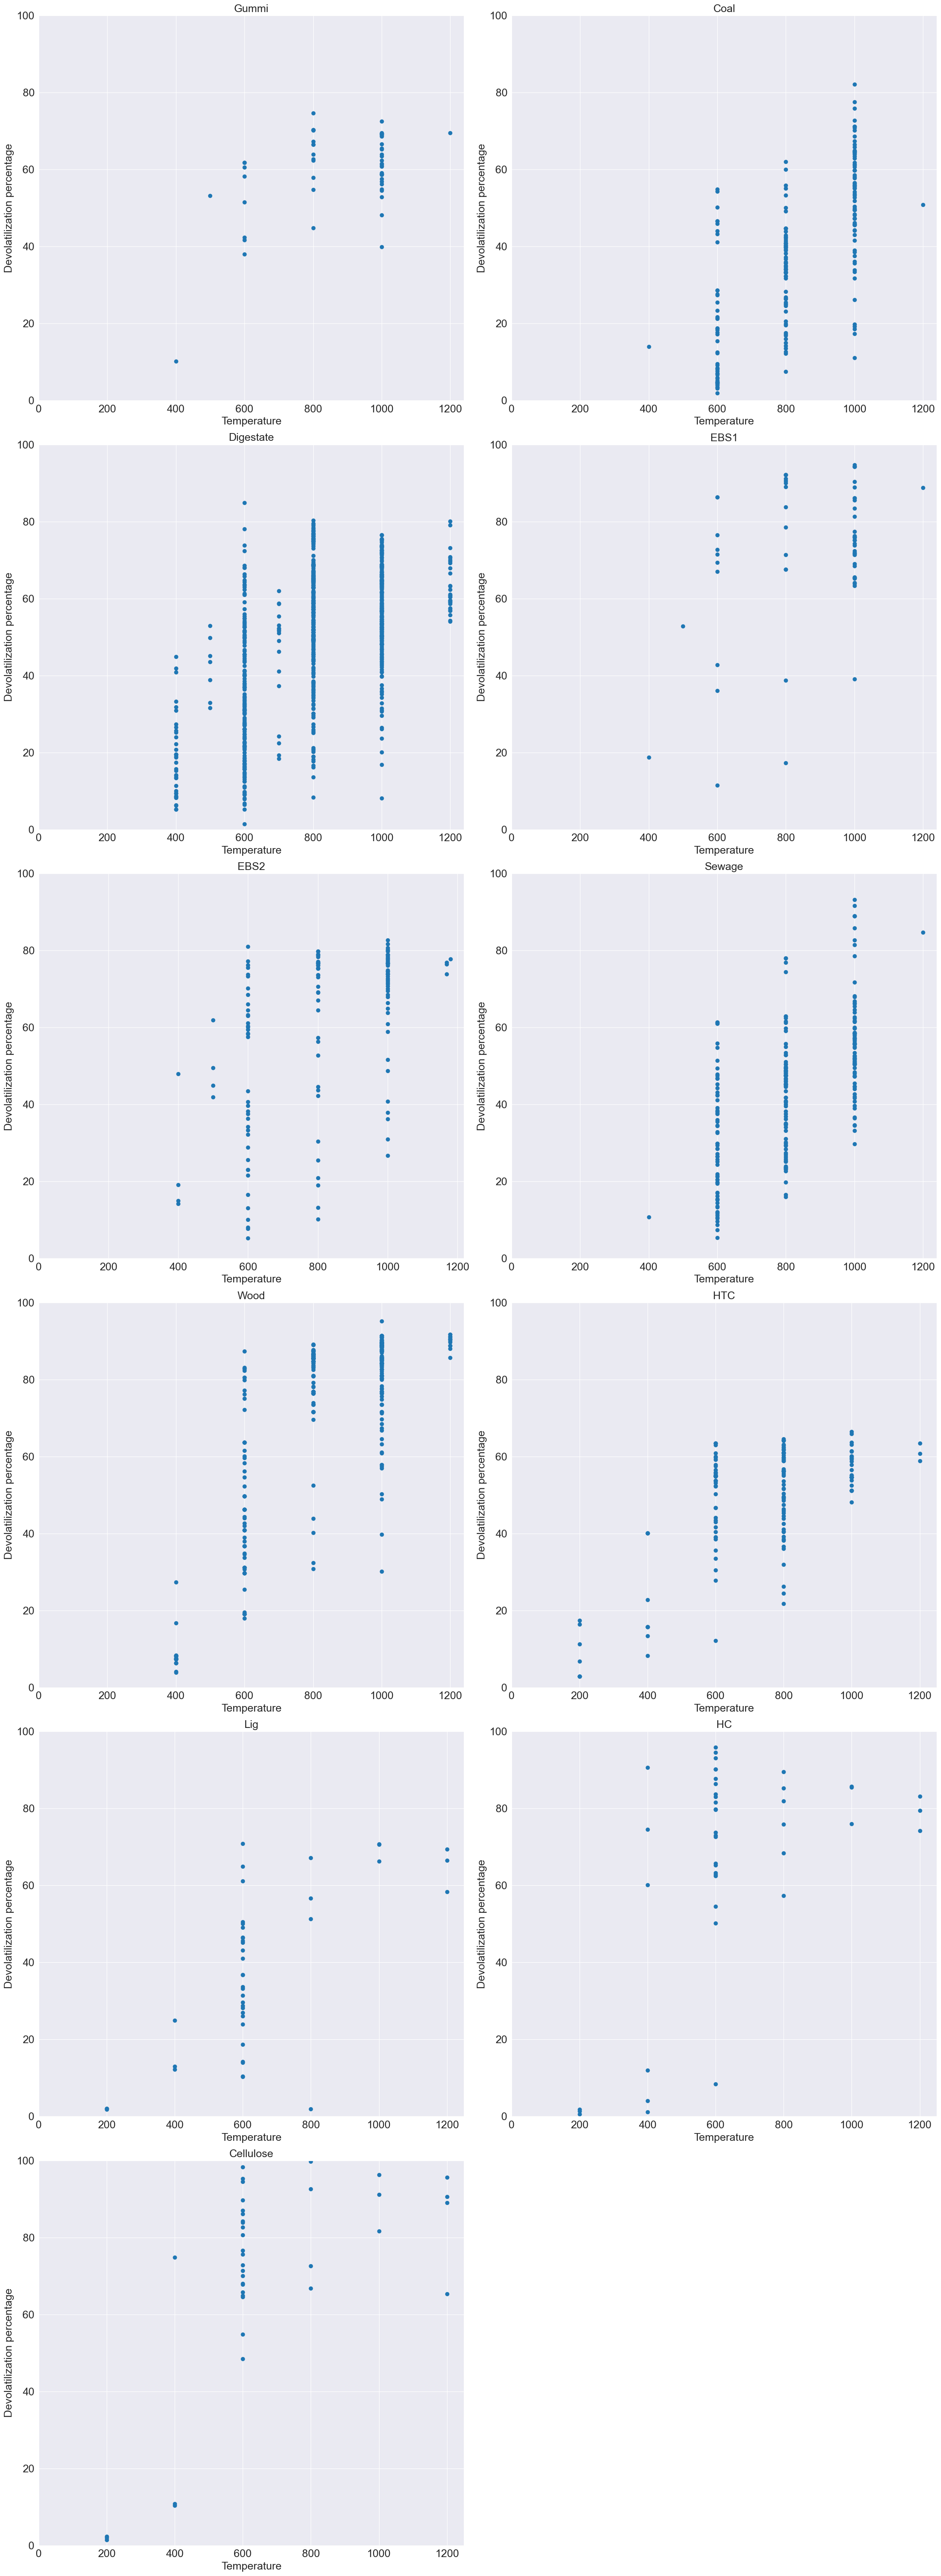

In [18]:
import matplotlib.pyplot as plt

# List of sample DataFrames and their corresponding titles
samples = [
    ("Gummi", gummi_samples_df),
    ("Coal", coal_samples_df),
    ("Digestate", digestate_samples_df),
    ("EBS1", ebs1_samples_df),
    ("EBS2", ebs2_samples_df),
    ("Sewage", sewage_samples_df),
    ("Wood", wood_samples_df),
    ("HTC", htc_samples_df),
    ("Lig", lig_samples_df),
    ("HC", hc_samples_df),
    ("Cellulose", cellulose_samples_df)
]

# Create the figure
plt.figure(figsize=(22, 60))

# Loop through each sample for plotting
for i, (name, df) in enumerate(samples, start=1):
    plt.subplot(6, 2, i)
    plt.scatter(df['temperature'], df['devol_yield'])
    plt.title(name, fontsize=18)
    plt.ylabel('Devolatilization percentage', fontsize=18)
    plt.xlabel('Temperature', fontsize=18)
    plt.setp(plt.gca().get_xticklabels(), fontsize=18)
    plt.setp(plt.gca().get_yticklabels(), fontsize=18)
    plt.xlim(0)
    plt.ylim(0, 100)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


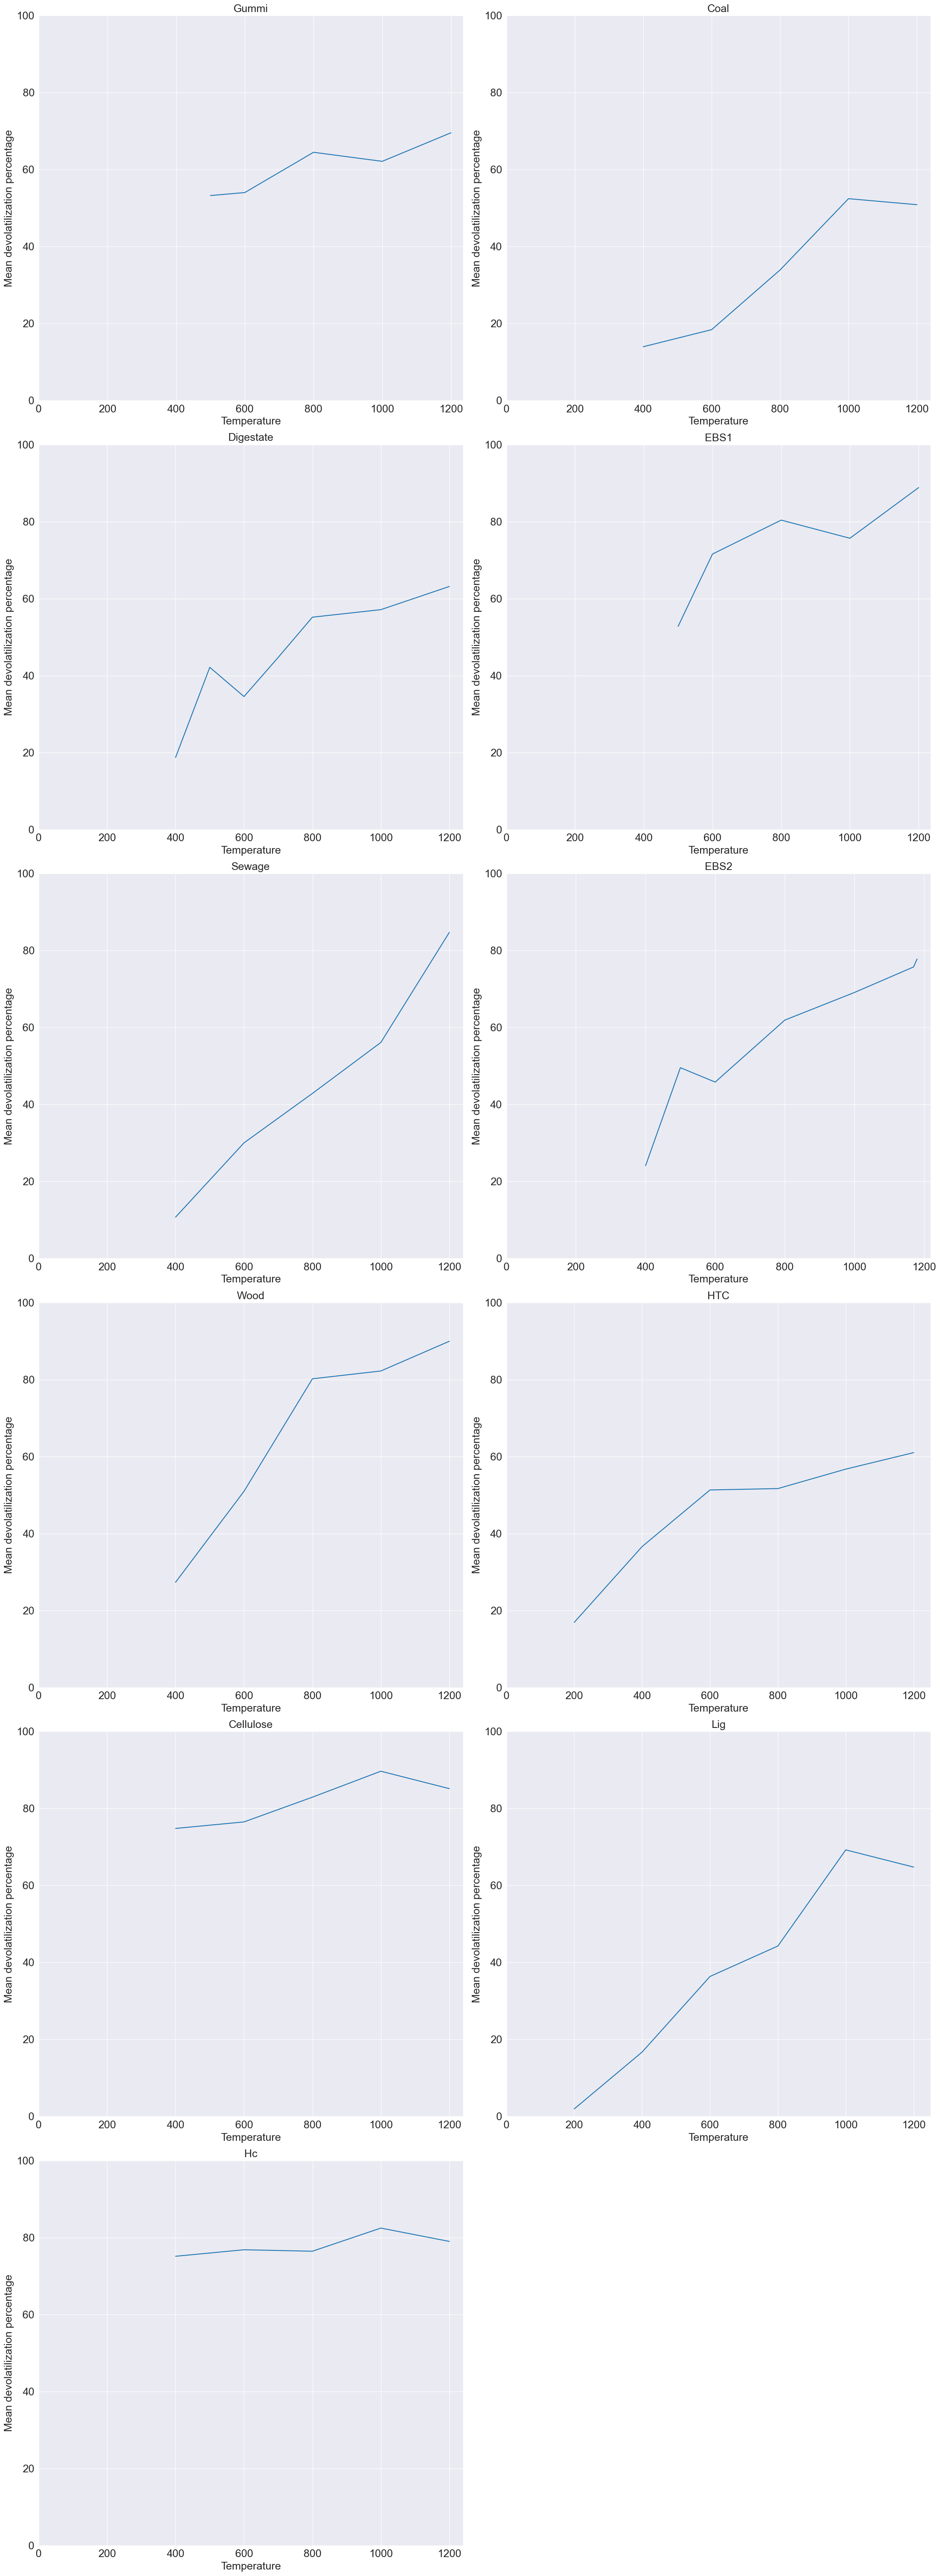

In [19]:
import numpy as np

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of all sample DataFrames
sample_dfs = {
    'Gummi': gummi_samples_df,
    'Coal': coal_samples_df,
    'Digestate': digestate_samples_df,
    'EBS1': ebs1_samples_df,
    'Sewage': sewage_samples_df,
    'EBS2': ebs2_samples_df,
    'Wood': wood_samples_df,
    'HTC': htc_samples_df,
    'Cellulose': cellulose_samples_df,
    'Lig': lig_samples_df,
    'Hc': hc_samples_df,
}

# Process each sample
mean_yields = {}
for fuel, df in sample_dfs.items():
    if not df.empty:  # Ensure DataFrame is not empty
        # Remove outliers
        df_clean = remove_outliers(df, 'devol_yield')

        # Group by temperature and calculate the mean
        mean_yield = df_clean.groupby('temperature')['devol_yield'].mean()
        mean_yields[fuel] = mean_yield

plt.figure(figsize=(22, 60))
for i, (fuel, mean_yield) in enumerate(mean_yields.items(), start=1):
    plt.subplot(6, 2, i)
    plt.plot(mean_yield.index, mean_yield.values)
    plt.title(f"{fuel}", fontsize=18)
    plt.ylabel('Mean devolatilization percentage', fontsize=18)
    plt.xlabel('Temperature', fontsize=18)
    plt.setp(plt.gca().get_xticklabels(), fontsize=18)
    plt.setp(plt.gca().get_yticklabels(), fontsize=18)
    plt.xlim(0)
    plt.ylim(0, 100)


plt.tight_layout()
plt.show()


### Mean Devolatilization Percentages (Released Volatile Mass/Dry Fuel)
For each fuel the mean of the volatile relesase has been taking account for each temperature value regardless of the other parameter variations.

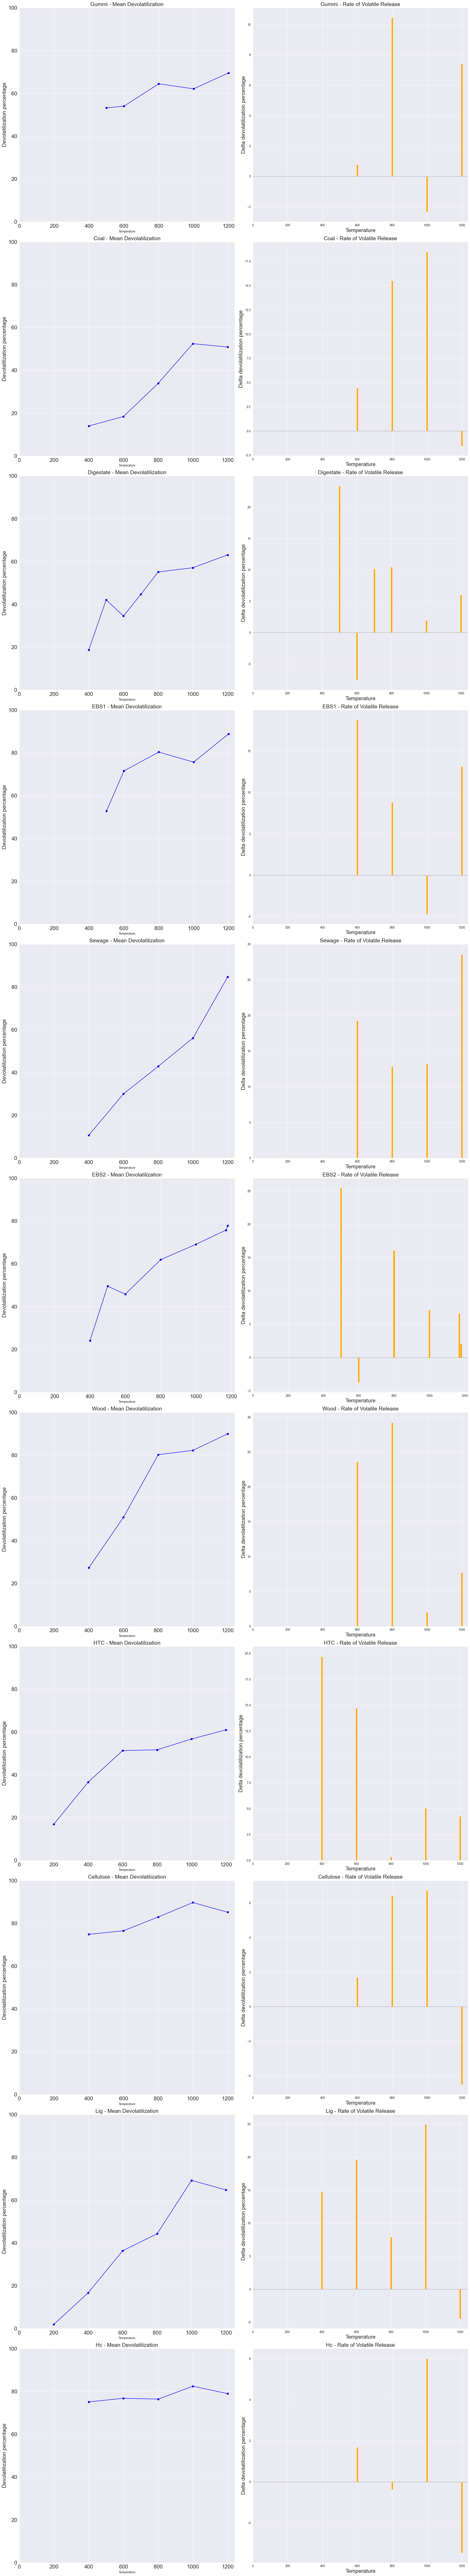

In [20]:
plt.figure(figsize=(22, 120))

for i, (fuel, mean_yield) in enumerate(mean_yields.items(), start=1):
    # Line plot for devolatilization percentage
    plt.subplot(len(mean_yields), 2, 2 * i - 1)
    plt.plot(mean_yield.index, mean_yield.values, marker='o', linestyle='-', color='blue')
    plt.title(f"{fuel} - Mean Devolatilization", fontsize=18)
    plt.ylabel('Devolatilization percentage', fontsize=18)
    plt.setp(plt.gca().get_xticklabels(), fontsize=18)
    plt.setp(plt.gca().get_yticklabels(), fontsize=18)
    plt.xlabel('Temperature')
    plt.xlim(0)
    plt.ylim(0, 100)

    # Calculate delta devolatilization
    delta_yield = mean_yield.diff()

    # Bar plot for delta (rate of release)
    plt.subplot(len(mean_yields), 2, 2 * i)
    plt.bar(delta_yield.index, delta_yield.values, color='orange', width=10)  # Adjust width for better spacing
    plt.title(f"{fuel} - Rate of Volatile Release", fontsize=18)
    plt.ylabel('Delta devolatilization percentage', fontsize=18)
    plt.xlabel('Temperature', fontsize=18)
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Horizontal reference line
    plt.xlim(0)

plt.tight_layout()
plt.show()

### Remaining Mass of the Fuels After Volatile Release

Basically 100 - Volatile Release (%)

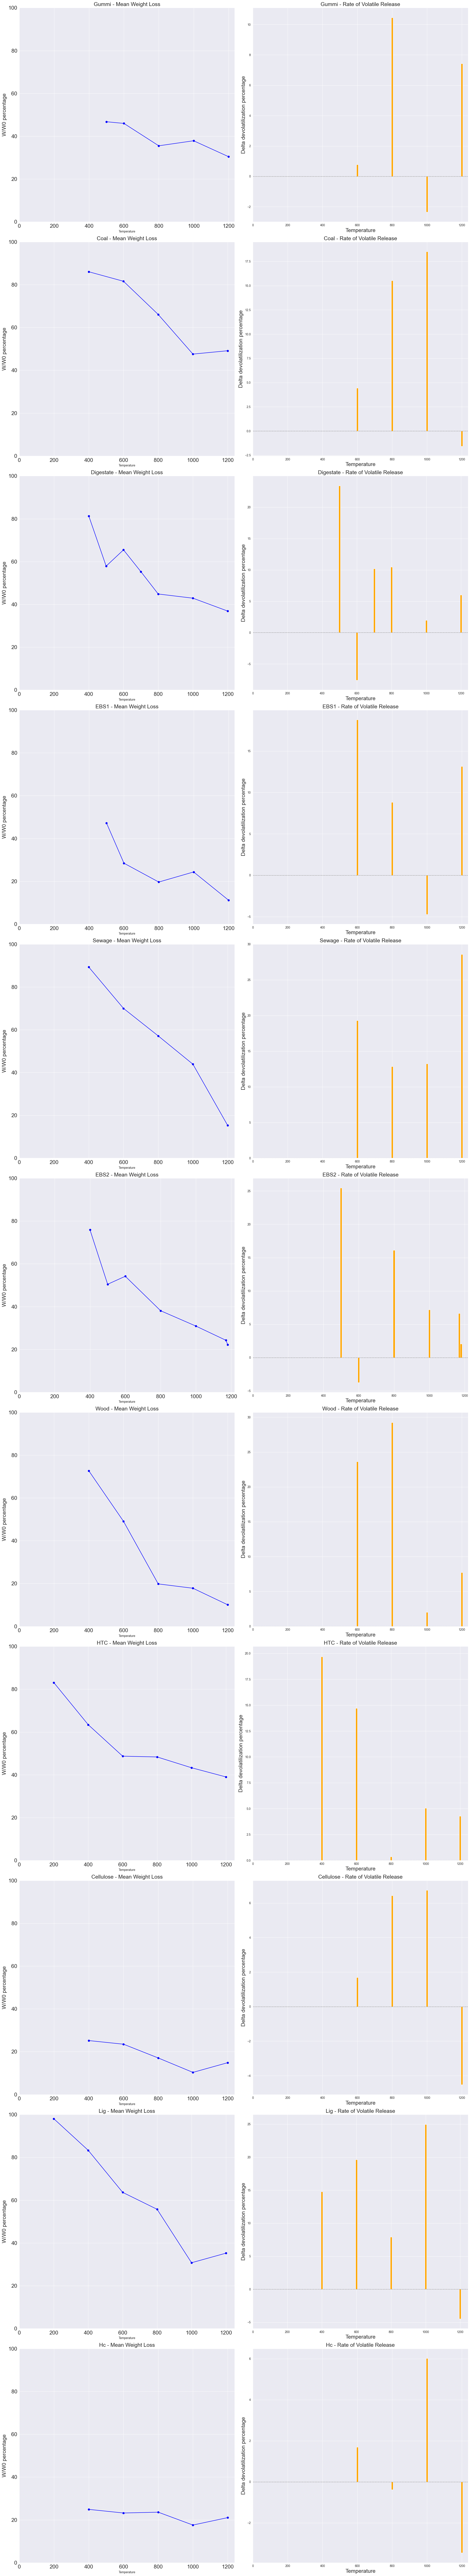

In [21]:
plt.figure(figsize=(22, 120))

for i, (fuel, mean_yield) in enumerate(mean_yields.items(), start=1):
    # Line plot for devolatilization percentage
    plt.subplot(len(mean_yields), 2, 2 * i - 1)
    plt.plot(mean_yield.index, (100-mean_yield.values), marker='o', linestyle='-', color='blue')
    plt.title(f"{fuel} - Mean Weight Loss", fontsize=18)
    plt.ylabel('W/W0 percentage', fontsize=18)
    plt.setp(plt.gca().get_xticklabels(), fontsize=18)
    plt.setp(plt.gca().get_yticklabels(), fontsize=18)
    plt.xlabel('Temperature')
    plt.xlim(0)
    plt.ylim(0, 100)

    # Calculate delta devolatilization
    delta_yield = mean_yield.diff()

    # Bar plot for delta (rate of release)
    plt.subplot(len(mean_yields), 2, 2 * i)
    plt.bar(delta_yield.index, delta_yield.values, color='orange', width=10)  # Adjust width for better spacing
    plt.title(f"{fuel} - Rate of Volatile Release", fontsize=18)
    plt.ylabel('Delta devolatilization percentage', fontsize=18)
    plt.xlabel('Temperature', fontsize=18)
    plt.ylabel('Delta devolatilization percentage')
    plt.xlabel('Temperature')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Horizontal reference line
    plt.xlim(0)

plt.tight_layout()
plt.show()